In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

In [41]:
# === Step 1: Load and Inspect the Data ===
print("--- 1. Loading the Iris Dataset ---")
# Load the data directly from scikit-learn
iris = load_iris()
X = iris.data  # Features (Sepal Length, Sepal Width, Petal Length, Petal Width)
y = iris.target # Labels (0=Setosa, 1=Versicolor, 2=Virginica)

--- 1. Loading the Iris Dataset ---


In [42]:
# Convert to a DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
print(df.head())
print(f"\nTotal number of samples: {len(df)}")

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Total number of samples: 150


In [43]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [44]:
# === Step 2: Split Data (Training and Testing) ===
# Split the data into 70% for training and 30% for testing.
# stratify=y ensures that the class distribution is maintained in both sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")


Training set size: 105 samples
Testing set size: 45 samples


In [45]:
# === Step 3: Feature Scaling (Normalization) ===
# KNN is distance-based, so scaling is critical to prevent features with large values from dominating.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit and Transform on training data
X_test_scaled = scaler.transform(X_test)       # Only Transform on test data (using parameters learned from training)

In [46]:
# === Step 4: Build and Train the KNN Model ===
# We start by choosing K=5 as a common heuristic.
K_value = 14
knn_model = KNeighborsClassifier(n_neighbors=K_value)

print(f"\n--- 4. Training the KNN Model with K={K_value} ---")
knn_model.fit(X_train_scaled, y_train)


--- 4. Training the KNN Model with K=14 ---


,n_neighbors,14
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [47]:
# === Step 5: Prediction and Model Evaluation ===
y_pred = knn_model.predict(X_test_scaled)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nKNN Model Accuracy: {accuracy:.4f}")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix (Visualizing correct/incorrect classifications)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


KNN Model Accuracy: 0.9556

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


In [48]:
# === Step 6: Optimize K (Hyperparameter Tuning) ===
# We search for the optimal K value in the range of 1 to 20
neighbors = np.arange(1, 21)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    # Initialize and train the model for each K
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Calculate accuracy on the training and testing sets
    train_accuracy[i] = knn.score(X_train_scaled, y_train)
    test_accuracy[i] = knn.score(X_test_scaled, y_test)

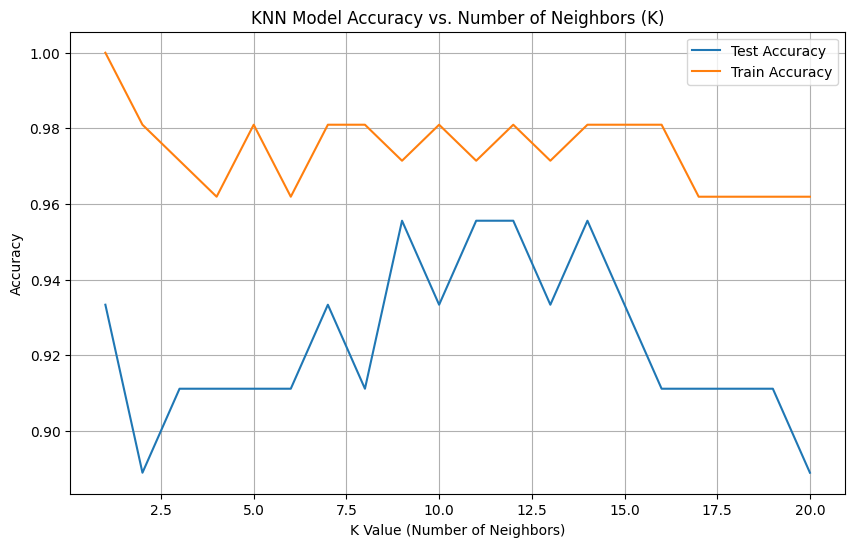

In [49]:
# Plotting the results to find the elbow point 
plt.figure(figsize=(10, 6))
plt.title('KNN Model Accuracy vs. Number of Neighbors (K)')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.xlabel('K Value (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
# Find the best K
best_k_index = np.argmax(test_accuracy)
best_k = neighbors[best_k_index]
best_accuracy = test_accuracy[best_k_index]
print(f"\nOptimal K value found: {best_k} with Test Accuracy: {best_accuracy:.4f}")


Optimal K value found: 9 with Test Accuracy: 0.9556
